# Textanalyse Sections

## Import Libraries

In [1]:
import pandas as pd
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None) # alle Spalten von Dataframes anzeigen
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from IPython.core.display import display, HTML

In [7]:
display(HTML("<style>.container { width:75% !important; }</style>")) # Breite des Notebooks 
pd.set_option('display.max_rows', None) # pd.options.display.max_rows = 999
# pd.options.display.max_rows = 999

# Daten laden, sichten, vorbereiten

In [4]:
df = pd.read_csv("aufbereitet_2019-12-15.csv", sep=";")

In [5]:
df.shape

(50451, 52)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50451 entries, 0 to 50450
Data columns (total 52 columns):
unique_id                     50451 non-null int64
title                         50451 non-null object
job_company                   50451 non-null object
company_link                  50451 non-null object
job_location                  50451 non-null object
contract_type                 50451 non-null object
wrk_time                      50451 non-null object
date                          50451 non-null object
job_url                       50451 non-null object
sections_str                  50451 non-null object
urls                          50451 non-null object
searches                      50451 non-null object
job_count                     50451 non-null int64
search                        50451 non-null object
function_level_2              50451 non-null int64
region                        50451 non-null int64
company_name                  49880 non-null object
company_loc

In [8]:
df.isnull().sum()

unique_id                         0
title                             0
job_company                       0
company_link                      0
job_location                      0
contract_type                     0
wrk_time                          0
date                              0
job_url                           0
sections_str                      0
urls                              0
searches                          0
job_count                         0
search                            0
function_level_2                  0
region                            0
company_name                    571
company_location                809
company_sector                28196
company_rating                30016
company_rating_count          30150
company_job_count              1379
company_employee_count        24863
company_website               31608
company_metadatablock         15124
function_level2_label             0
function_level1_label             0
function_level_1            

# Vorbereitung der Sections (Anzeigentext)
* Test der Anzeigen ist in Sektionen / Paragraphen unterteilt)
* Unterteilung jedoch uneinheitlich,
* teils steht kompletter Text in einem Abschnitt, teils bis zu 6 Abschnitte

## Entfernung von Umbrüchen und Trennungen in Wörtern

In [9]:
#Entfernung von Soft-Hyphens aus den Textfeldern: \\u200b \\xad \xa0 \xad  \n (HTML-Reste, SHY / Soft Hyphens, Non-Break-Spaces, Umbrüche etc.) 
def cleanup(x, column):
    if x is None:
        x = np.nan
    elif isinstance(x, float):
        x = np.nan
    else:
        x = str(x).replace("\\xad","").replace("\xad","").replace("\\xc2"," ").replace("\\xa0"," ").replace("\xa0"," ").replace("\n","").replace("\\u200b","").replace("\u200b","").replace("\\u202b"," ").replace("\u202b"," ").replace("\\u202f"," ").replace("\u202f"," ").replace("\x96 "," ").replace("\x92","").replace("\uf0a7","").replace("\u2009","").replace("\x84","").replace("\uf0b7","").replace("\u2005"," ").replace("\x9f"," ").replace("\x83Selbständige"," Selbständige").replace("\x96","")
    return x

In [10]:
df["sections_str"] = df["sections_str"].apply(cleanup, column=("sections_str"))

In [11]:
df["sections_str"].isnull().sum()

0

In [12]:
df["section1"] = df["section1"].apply(cleanup, column=("section1"))

In [13]:
df["section1"].isnull().sum()

0

In [14]:
df["section2"] = df["section2"].apply(cleanup, column=("section2"))

In [15]:
df["section2"].isnull().sum()

3112

In [16]:
df["section3"] = df["section3"].apply(cleanup, column=("section3"))

In [17]:
df["section3"].isnull().sum()

3528

In [18]:
df["section4"] = df["section4"].apply(cleanup, column=("section4"))

In [19]:
df["section4"].isnull().sum()

4103

#### Mit RE (RegEx) überprüfen ob alle \\\ und \ entfernt sind.

In [20]:
def umbruch(column):
    try:
        match = re.search(r'\w*\\\\\w+|\w*\\\w+', column)
        shy = match.group(0)
    except:
        shy = ''
    return shy

In [21]:
df["sections_str"].iloc[28]
#.astype("str").apply(lambda x: umbruch(x)).value_counts()

"['Entscheiden Sie sich für eine Zukunft mit besten Perspektiven! ALPMA ist Weltmarktführer im Bereich Maschinen- und Anlagenbau für die Käserei- und Lebensmittelindustrie. Wir beschäftigen weltweit über 875 Mitarbeiter und sind global in mehr als 50 Ländern aktiv. Unsere Mitarbeiter tragen maßgeblich dazu bei, dass wir uns weltweit etabliert haben und diese Position behaupten und stetig ausbauen können. Für unseren Geschäftsbereich Prozesstechnik am Standort Dresden suchen wir einen Ingenieur/ Techniker (m/w/d) für Automatisierungs- / Elektrotechnik', 'Ihre Aufgaben: Konzeptentwicklung und Pflichtenhefterstellung für Automatisierung/ Elektrotechnik Erstellung kundenindividueller Automatisierungslösungen der Prozessleittechnik auf Basis von Verfahrensbeschreibungen (Pflichtenheft / Lastenheft) Durchführen von Softwaretests in enger Zusammenarbeit mit Endkunden und Systempartnern Erstellung von Prozessvisualisierungen (TIA-Portal, WinCC, ProLeiT) Erstellung von Basisprojektierung (SPS-S

In [22]:
df["section1"].astype("str").apply(lambda x: umbruch(x)).value_counts()

                  50447
TBWA\Worldwide        3
\O                    1
Name: section1, dtype: int64

In [23]:
df["section2"].astype("str").apply(lambda x: umbruch(x)).value_counts()

                  50450
Leuchten\uDBC0        1
Name: section2, dtype: int64

In [24]:
df["sections_str"].astype("str").apply(lambda x: umbruch(x)).value_counts()

                                50122
\x96                               41
macht\x92s                         25
\uf0b7                             14
\u2009B                            12
\uf0a7                             12
1\u2009600                          9
\x84Wohlfühlatmosphäre              6
\x84Sehr                            5
AG\u2009                            5
\u2005gip                           5
\nFREUEN                            5
\x84Entrepreneur                    5
\x9f                                5
800\u2009000                        4
Pharmareferent\n                    4
\nVielfalt                          4
2\u2009000                          4
\x84machen                          4
1\u2009000                          4
20\u2009000                         4
\x84Maschinentechnik                3
\u2009ä                             3
28\u2009000                         3
\x85                                3
eine\u2009                          3
TBWA\\Worldw

In [25]:
df["section2"].astype("str").apply(lambda x: umbruch(x)).value_counts()

                  50450
Leuchten\uDBC0        1
Name: section2, dtype: int64

In [26]:
df["section3"].astype("str").apply(lambda x: umbruch(x)).value_counts()

           50450
E\uDBC0        1
Name: section3, dtype: int64

In [27]:
df["section4"].astype("str").apply(lambda x: umbruch(x)).value_counts()

    50451
Name: section4, dtype: int64

In [28]:
df["section5"].astype("str").apply(lambda x: umbruch(x)).value_counts()

    50451
Name: section5, dtype: int64

# Dictionary based scoring
* https://github.com/sgsinclair/alta/blob/dc47e4b47b133cee24a85e9817592971e67681cd/ipynb/utilities/ComplexSentimentAnalysis.ipynb
* rule-based vs. machine learning / semi-supervised: https://monkeylearn.com/text-classification/
* resource: https://textblob.readthedocs.io/en/dev/advanced_usage.html#sentiment-analyzers
* (https://www.kaggle.com/rosado/sentiment-analysis-text-mining)
* diskussion: https://brenocon.com/blog/2011/10/be-careful-with-dictionary-based-text-analysis/
vgl mit Topic Modelling?
* diskussion deep learning vs. rule based: https://dzone.com/articles/reasons-to-replace-dictionary-based-text-mining-wi

## Wörterbücher für weibliche und männliche Stereotype
Quellen:
* Gaucher et al. 2011
* Schneider-Düker, Marianne/André Kohler 1988: (BEM-Sex-Role-Inventory)
* Troche und Rammsayer (2011)
* Hentschel et al 2019
#### Resources: 
* https://brenocon.com/blog/2011/10/be-careful-with-dictionary-based-text-analysis/
* https://textblob.readthedocs.io/en/dev/advanced_usage.html#sentiment-analyzers
* dictionary based sentiment analysis: https://github.com/sgsinclair/alta/blob/dc47e4b47b133cee24a85e9817592971e67681cd/ipynb/utilities/ComplexSentimentAnalysis.ipynb bzw. https://methodi.ca/recipes/dictionary-based-sentiment-analysis-python



### Stereotype aus Excel-Datei importieren

In [29]:
df_stereotypes= pd.read_excel("Geschlechterstereotype.xlsx")

In [30]:
df_stereotypes.head()

,Männlich,source,original,Weiblich,source.1,original.1
0,zielstrebig,hentschel,NaN,engagiert,hentschel,NaN
1,selbständig,hentschel,NaN,engagement,hentschel,synonym
2,direkt,hentschel,NaN,verantwortungsvoll,hentschel,NaN
3,kompetenz,hentschel,NaN,verantwortungsbewusst,hentschel,synonym
4,analytisch,hentschel,NaN,verantwortungsbewusstsein,hentschel,synonym


### Lemmatize 
* Schritt wird weggelassen
* kein Unterschied in den Ergebnissen

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
df_stereotypes['female_lemma'] = df_stereotypes['Weiblich'].astype("str").apply(lambda x: lemmatizer.lemmatize(x))

In [33]:
df_stereotypes['male_lemma'] = df_stereotypes['Männlich'].astype("str").apply(lambda x: lemmatizer.lemmatize(x))

In [34]:
df_stereotypes['female_lemma']

0                      engagiert
1                     engagement
2             verantwortungsvoll
3          verantwortungsbewusst
4      verantwortungsbewusstsein
5                 kontaktfreudig
6                     förderlich
7                   unterstützen
8                       begabung
9                         begabt
10                vertrauensvoll
11                  gewissenhaft
12                  kollaborativ
13                 verantwortung
14                         loyal
15                  verpflichten
16                  sensitivität
17            zwischenmenschlich
18                   aufmunternd
19                       ehrlich
20                    empathisch
21                    festgelegt
22                  verpflichtet
23                  verpflichten
24                       fördern
25                      erziehen
26              gemeinschaftlich
27                  gemeinschaft
28                      herzlich
29                         gütig
30        

### Convert to list format

In [35]:
male = df_stereotypes["Männlich"].to_list()
female = df_stereotypes["Weiblich"].to_list()
# Alternativ mit Lemmas:
# male = df_stereotypes["male_lemma"].to_list()
# female = df_stereotypes["female_lemma"].to_list()
print(len(male))
print(len(female))

149
149


In [36]:
male.remove(".")
print(male)
print(female)

['zielstrebig', 'selbständig', 'direkt', 'kompetenz', 'analytisch', 'einsetzen', 'offensiv', 'erfolgsversprechend', 'entschlossen', 'leistungsorientiert', 'leistungsbereit', 'zielorientiert', 'ergebnisorientiert', 'ehrgeiz', 'außergewöhnlich', 'leistung', 'einsatz', 'einsatzbereit', 'einsatzbereitschaft', 'selbstbewusstsein', 'aktiv', 'analysierend', 'analysieren', 'autonom', 'souverän', 'beharren', 'bestehen', 'bestimmend', 'bestimmen', 'direkt', 'geradeheraus', 'dominant', 'ehrgeizig', 'entscheiden', 'entscheidungsfreudig', 'entscheidung', 'führend', 'hartnäckig', 'herausfordernd', 'hierarchisch', 'individuell', 'intellektuell', 'konkurrierend', 'logisch', 'meinung', 'mutig', 'objektiv', 'prinzipiell', 'selbstbewusst', 'selbstsicher', 'selbständig', 'unabhängig', 'autark', 'bestimmt', 'unerschrocken', 'sachlich', 'intelligent', 'risiko', 'risikobereit', 'riskieren', 'kraftvoll', 'furchtlos', 'scharfsinnig', 'sicher', 'konsequent', 'geschäftsmäßig', 'ambitioniert', 'ambitionen', 'durc

## Anzahl von Wörtern im Anzeigntext (sections_str)

In [37]:
#print(df['sections_str'].iloc[0])

In [38]:
# Anzahl der Wörter zählen und in neue Spalte schreiben:
df['sections_wordcount'] = df['sections_str'].apply(lambda x: len(x.split()))

In [39]:
df['sections_wordcount'].describe()

count    50451.000000
mean       337.741571
std        108.004495
min         61.000000
25%        260.000000
50%        322.000000
75%        398.000000
max       1240.000000
Name: sections_wordcount, dtype: float64

In [40]:
df['sections_wordcount'].value_counts()

278     267
342     250
314     250
322     249
273     245
341     243
310     242
277     242
263     235
283     233
303     228
297     227
330     225
275     224
255     224
266     223
328     222
279     219
262     219
319     218
250     217
338     217
300     216
249     214
295     213
258     213
302     213
260     212
350     211
291     210
290     209
284     209
261     208
313     208
268     208
325     207
323     207
270     207
296     206
285     206
292     205
344     205
335     204
354     204
317     203
305     203
304     203
306     202
269     202
312     201
299     200
311     200
252     200
301     200
286     199
320     199
240     199
288     199
351     199
248     198
271     197
346     197
287     197
336     196
352     195
274     195
347     195
267     194
282     193
321     193
327     193
230     193
257     192
276     192
315     190
294     190
281     190
289     189
280     188
308     188
318     188
343     187
349     187
309 

In [41]:
df[df['sections_wordcount'] > 1000].head()

,unique_id,title,job_company,company_link,job_location,contract_type,wrk_time,date,job_url,sections_str,urls,searches,job_count,search,function_level_2,region,company_name,company_location,company_sector,company_rating,company_rating_count,company_job_count,company_employee_count,company_website,company_metadatablock,function_level2_label,function_level1_label,function_level_1,job_id,sectionlength,section_list,section1,section2,section3,section4,section5,section6,function_both_levels,function_both_levels_count,Führungskraft,kldb10_2,kldb10_3,kldb10_4,kldb10_2_label,kldb10_3_label,frauenanteil_mz14_kldb10_2,Frauenanteil_MZ14_kldb10_3,Bundesland,Vertragsart,Befristung,company_emp_count,company_emp_count_gendered,sections_wordcount
20134,20136,Berater / Verkäufer für Bodenbeläge im Außendi...,Altro Debolon,https://www.stepstone.de/cmp/de/Altro-Debolon-...,"Region Bayreuth, Nürnberg, Erlangen, Regensburg",Feste Anstellung,Vollzeit,2019-07-16,https://www.stepstone.de/stellenangebote--Bera...,['Wenn Kollegen Freunde werden. Die Grundlage ...,https://www.stepstone.de/stellenangebote--Bera...,https://www.stepstone.de/5/ergebnisliste.html?...,267,https://www.stepstone.de/5/ergebnisliste.html?...,2003000,200000081,Altro Debolon,"06846 Dessau-Roßlau, Deutschland",NaN,NaN,NaN,1.0,NaN,NaN,NaN,Außendienst,Vertrieb und Verkauf,2000000,5908712,5,['Wenn Kollegen Freunde werden. Die Grundlage ...,Wenn Kollegen Freunde werden. Die Grundlage da...,Erklärungsbedürftiger Vertrieb bei Innovations...,Sie und Altro Debolon: Fachlich bewegen Sie si...,Altro Debolon bewirbt sich bei Ihnen: mit eine...,"Kontakt: Wir freuen uns, Sie bald zu treffen. ...",NaN,Außendienst - Vertrieb und Verkauf,1583,0,61.0,611.0,6112.0,"Einkaufs-, Vertriebs- und Handelsberufe",Einkauf und Vertrieb,0.367397,30.94,Bayern,Anstellung,nicht bekannt,NaN,0,1032
40724,40726,Professur für das Lehrgebiet „Konstruktion und...,Hochschule für Angewandte Wissenschaften Hamburg,https://www.stepstone.de/cmp/de/Hochschule-fue...,Hamburg,Feste Anstellung,Vollzeit,2019-07-22,https://www.stepstone.de/stellenangebote--Prof...,['FAKULTÄT TECHNIK UND INFORMATIK - DEPARTMENT...,https://www.stepstone.de/stellenangebote--Prof...,https://www.stepstone.de/5/ergebnisliste.html?...,3,https://www.stepstone.de/5/ergebnisliste.html?...,22004000,423640,Hochschule für Angewandte Wissenschaften Hamburg,Hamburg,NaN,NaN,NaN,7.0,NaN,NaN,"<div data-block=""app-inShort"" data-brand=""{}"" ...","Universität, Fachhochschule",Bildung und Soziales,22000000,5931130,5,['FAKULTÄT TECHNIK UND INFORMATIK - DEPARTMENT...,FAKULTÄT TECHNIK UND INFORMATIK - DEPARTMENT F...,IHRE AUFGABEN Sie vertreten die Fachgebiete Ko...,IHR PROFIL Sie haben ein Hochschulstudium der ...,UNSER ANGEBOT Wir bieten Ihnen eine anspruchsv...,WIR FREUEN UNS AUF IHRE BEWERBUNG Die Hochschu...,NaN,"Universität, Fachhochschule - Bildung und Sozi...",26,0,84.0,843.0,8430.0,Lehrende und ausbildende Berufe,"Lehr-,Forschungstätigkeit an Hochschulen",0.582022,40.06,Hamburg,Anstellung,nicht bekannt,NaN,0,1240


In [42]:
df[["sections_wordcount", "company_emp_count"]].corr(method="pearson")

,sections_wordcount,company_emp_count
sections_wordcount,1.000000,0.268601
company_emp_count,0.268601,1.000000


## Female / male word counts & FM-Score
* https://github.com/sgsinclair/alta/blob/dc47e4b47b133cee24a85e9817592971e67681cd/ipynb/utilities/ComplexSentimentAnalysis.ipynb

In [43]:
df.head(1)

,unique_id,title,job_company,company_link,job_location,contract_type,wrk_time,date,job_url,sections_str,urls,searches,job_count,search,function_level_2,region,company_name,company_location,company_sector,company_rating,company_rating_count,company_job_count,company_employee_count,company_website,company_metadatablock,function_level2_label,function_level1_label,function_level_1,job_id,sectionlength,section_list,section1,section2,section3,section4,section5,section6,function_both_levels,function_both_levels_count,Führungskraft,kldb10_2,kldb10_3,kldb10_4,kldb10_2_label,kldb10_3_label,frauenanteil_mz14_kldb10_2,Frauenanteil_MZ14_kldb10_3,Bundesland,Vertragsart,Befristung,company_emp_count,company_emp_count_gendered,sections_wordcount
0,1,Automatisierer (w/m/d),Berliner Wasserbetriebe,https://www.stepstone.de/cmp/de/Berliner-Wasse...,Berlin,Feste Anstellung,Vollzeit,2019-07-18,https://www.stepstone.de/stellenangebote--Auto...,['Über die Berliner Wasserbetriebe Die Berline...,https://www.stepstone.de/stellenangebote--Auto...,https://www.stepstone.de/5/ergebnisliste.html?...,9,https://www.stepstone.de/5/ergebnisliste.html?...,10012000,419239,Berliner Wasserbetriebe,Berlin,Energie- und Wasserversorgung & Entsorgung,4.6,17.0,23.0,0-50,http://netzdermöglichkeiten.de,"<div data-block=""app-inShort"" data-brand='{""pr...",Automatisierungstechnik,Ingenieure und technische Berufe,10000000,5922324,5,['Über die Berliner Wasserbetriebe Die Berline...,Über die Berliner Wasserbetriebe Die Berliner ...,Was Sie bei uns bewegen Eigenständige Programm...,Das bringen Sie mit Bachelorabschluss Elektro-...,Warum Sie sich für uns entscheiden sollten Inn...,Informationen zur Bewerbung Ihre Ansprechpartn...,NaN,Automatisierungstechnik - Ingenieure und techn...,192,0,26.0,261.0,2612.0,"Mechatronik-, Energie- u. Elektroberufe",Mechatronik und Automatisierungstechnik,0.086381,5.69,Berlin,Anstellung,nicht bekannt,50.0,0,402


In [44]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
tokenizer = RegexpTokenizer(r'\w+')

In [45]:
tokenizer.tokenize(df["sections_str"].iloc[200].lower())

['schönlein',
 'verkehrstechnik',
 'gmbh',
 'überzeugen',
 'durch',
 'leistung',
 'als',
 'fachunternehmen',
 'sind',
 'wir',
 'durch',
 'unser',
 'personal',
 'zertifiziert',
 'baustellensicherungen',
 'und',
 'verkehrsplanungen',
 'auf',
 'allen',
 'land',
 'und',
 'bundesstraßen',
 'sowie',
 'bundesautobahnen',
 'sowohl',
 'inner',
 'als',
 'auch',
 'außer',
 'orts',
 'auszuführen',
 'unser',
 'umfangreiches',
 'leistungsspektrum',
 'beinhaltet',
 'weitreichende',
 'serviceangebote',
 'rund',
 'um',
 'baustellen',
 'und',
 'verkehrssicherung',
 'die',
 'fahrbahnmarkierung',
 'und',
 'die',
 'eventabsicherung',
 'durch',
 'temporäre',
 'lichtsignalanlagen',
 'verkehrszeichen',
 'sowie',
 'bauzäune',
 'zur',
 'unterstützung',
 'unserer',
 'teams',
 'an',
 'den',
 'standorten',
 'dresden',
 'leipzig',
 'cottbus',
 'chemnitz',
 'und',
 'löbau',
 'sowie',
 'berlin',
 'hamburg',
 'und',
 'mannheim',
 'suchen',
 'wir',
 'verkehrsingenieure',
 'innen',
 'wir',
 'bieten',
 'ihnen',
 'eine',


In [46]:
# from somajo import Tokenizer
# from nltk.tokenize import WordPunctTokenizer
# from nltk.tokenize import word_tokenize

In [47]:
# tokenizer = Tokenizer(split_camel_case=True, token_classes=False, extra_info=False)
# text = str(df["sections_str"].iloc[28]).lower()
# print(text)
# word_tokenize(str(text).lower(), language="german")

# print(tokens)
# WordPunctTokenizer(text)

In [48]:
#tokenizer.tokenize(str(text).lower())

#### evtl noch pipeline mit stemming/lemmas einbauen!
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def wordlemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

### Funktionen für Zählung & Scoring 

In [49]:
def female_count(column):
    count = 0
    tokens = tokenizer.tokenize(str(column).lower())  # word_tokenize(str(column).lower(), language='german')
    for word in tokens:
        if word in female:
            count += 1
        else:
            pass
    return count

In [50]:
def male_count(column):
    count = 0
    tokens = tokenizer.tokenize(str(column).lower()) #word_tokenize(str(column).lower(), language='german') 
    for word in tokens:
        if word in male:
            count  += 1
        else: 
            pass
    return count

In [51]:
def fm_score(column):
    # Count female words
    tokens = tokenizer.tokenize(str(column).lower()) # word_tokenize(str(column).lower(), language='german')
    female_count = 0
    for word in tokens:
        if word in female:
            female_count += 1
    # Count male words
    male_count = 0
    for word in tokens:
        if word in male:
            male_count += 1
    score = (female_count - male_count)
    return score

text = df['sections_str'].iloc[28]
tokens1 = tokenizer.tokenize(str(text).lower())
tokens2 = word_tokenize(str(text).lower(), language='german')
def Diff(tok1, tok2):
    diff = [i for i in tok1 + tok2 if i not in tok1 or i not in tok2]
    return diff
Diff(tokens1, tokens2)

In [52]:
male_count(df['sections_str'].iloc[28])

3

In [53]:
female_count(df['sections_str'].iloc[28])

1

In [54]:
fm_score(df['sections_str'].iloc[28])

-2

#### Female Count

In [55]:
df["sections_femalecount"] = df["sections_str"].apply(lambda x: female_count(x))

In [56]:
df["section1_femalecount"] = df["sections_str"].apply(lambda x: female_count(x))

In [57]:
df["section2_femalecount"] = df["section2"].apply(lambda x: female_count(x))

In [58]:
df["section3_femalecount"] = df["section3"].apply(lambda x: female_count(x))

#### Male Count

In [59]:
df["sections_malecount"] = df["sections_str"].apply(lambda x: male_count(x))

In [60]:
df["section1_malecount"] = df["sections_str"].apply(lambda x: male_count(x))

In [61]:
df["section2_malecount"] = df["section2"].apply(lambda x: male_count(x))

In [62]:
df["section3_malecount"] = df["section3"].apply(lambda x: male_count(x))

In [63]:
df["sections_fmscore"] = df["sections_str"].apply(lambda x: fm_score(x))

#### FM-Score 
* Female count - male count

In [65]:
df["section1_fmscore"] = df["sections_str"].apply(lambda x: fm_score(x))

In [66]:
df["section2_fmscore"] = df["section2"].apply(lambda x: fm_score(x))

In [67]:
df["section3_fmscore"] = df["section3"].apply(lambda x: fm_score(x))

### Stereotype im kompletten Anzeigentext

In [68]:
# 245358 mit oder ohne lemma bei male/female lists
# evtl Unterschied wenn tokens gelemmatized werden (pipeline?)
# word_tokenize 245814
# Tokenizer.tokenize: 252178
# Umbrüche/non-break-space usw. entfernt: 253235
# missings entfernt: 253235

In [69]:
df["sections_fm_count"] = df["sections_malecount"] + df["sections_femalecount"]
print(df["sections_fm_count"].sum())
df["sections_fm_count"].describe()

372730


count    50451.000000
mean         7.387961
std          3.794455
min          0.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         30.000000
Name: sections_fm_count, dtype: float64

### Section 1: Firmenprofil

In [70]:
df["section1_fm_count"] = df["section1_malecount"] + df["section1_femalecount"]
print(df["section1_fm_count"].sum())
df["section1_fm_count"].describe()

372730


count    50451.000000
mean         7.387961
std          3.794455
min          0.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         30.000000
Name: section1_fm_count, dtype: float64

### Section 2: Stellenprofil

In [71]:
df["section2_fm_count"] = df["section2_malecount"] + df["section2_femalecount"]
print(df["section2_fm_count"].sum())
df["section2_fm_count"].describe()

83123


count    50451.000000
mean         1.647599
std          1.788365
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: section2_fm_count, dtype: float64

### Section 3: Qualifikationsprofil

In [72]:
df["section3_fm_count"] = df["section3_malecount"] + df["section3_femalecount"]
print(df["section3_fm_count"].sum())
df["section3_fm_count"].describe()

147055


count    50451.000000
mean         2.914808
std          2.147919
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: section3_fm_count, dtype: float64

### female_fem_rel - Relativer Anteil weiblicher Stereotype an allen Stereotypen

In [73]:
df["sections_fem_rel"] = round((df["sections_femalecount"]/df["sections_fm_count"])*100,2)
df["sections_fem_rel"].describe()

count    50069.000000
mean        51.660262
std         22.175484
min          0.000000
25%         37.500000
50%         50.000000
75%         66.670000
max        100.000000
Name: sections_fem_rel, dtype: float64

### Unipolare Stereotype Skala

In [74]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [75]:
sigmoid(0)

0.5

In [76]:
df["sections_stereoscore"] = df["sections_fmscore"].apply(lambda x: sigmoid(x))

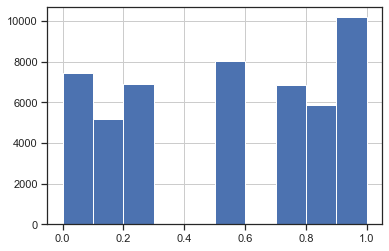

In [77]:
df["sections_stereoscore"].hist()

In [78]:
from sklearn import preprocessing
# Get column names first
# names = df.columns

scaler = preprocessing.StandardScaler()
df["sections_femrel_std"] = scaler.fit_transform(df[["sections_fem_rel"]])
#df[] = pd.DataFrame(scaled_df, columns="sections_femrel_std")
df["sections_femrel_std"] = round(df["sections_femrel_std"],4)

df["sections_femrel_std"] = (df["sections_fem_rel"].dropna() - df["sections_fem_rel"].mean(skipna=True)) / df["sections_fem_rel"].std(skipna=True) 

In [79]:
# Zentrierung:
df["sections_femrel_std"] = df["sections_fem_rel"].apply(lambda x: (x - df["sections_fem_rel"].mean()))

In [80]:
df["sections_femrel_std"].describe()

count    5.006900e+04
mean    -9.781759e-15
std      2.217548e+01
min     -5.166026e+01
25%     -1.416026e+01
50%     -1.660262e+00
75%      1.500974e+01
max      4.833974e+01
Name: sections_femrel_std, dtype: float64

In [81]:
#nach der Zentrierung werden absolute Werte verwendet:
df["sections_femrel_std"] = abs(df["sections_femrel_std"])

In [82]:
df["sections_femrel_std"].describe()

count    50069.000000
mean        17.251750
std         13.932813
min          0.059738
25%          6.669738
50%         15.009738
75%         23.339738
max         51.660262
Name: sections_femrel_std, dtype: float64

### Standardize

In [83]:
def standardize(var):
    std=round((var - var.mean()) / var.std(),2)
    return std

In [84]:
df["sections_fmscore_std"] = standardize(df["sections_fmscore"]) 

In [85]:
df["section2_fmscore_std"] = standardize(df["section2_fmscore"]) 

In [86]:
df["section3_fmscore_std"] = standardize(df["section3_fmscore"]) 

In [87]:
df[(df.duplicated(['Bundesland', "sections_malecount", "sections_femalecount",
                   "sections_fmscore", "kldb10_3",'function_both_levels', 
                   'job_id', 'sections_str'], keep=False))]["unique_id"].sum()

0

## Überflüssige/Doppelte Spalten löschen

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50451 entries, 0 to 50450
Data columns (total 75 columns):
unique_id                     50451 non-null int64
title                         50451 non-null object
job_company                   50451 non-null object
company_link                  50451 non-null object
job_location                  50451 non-null object
contract_type                 50451 non-null object
wrk_time                      50451 non-null object
date                          50451 non-null object
job_url                       50451 non-null object
sections_str                  50451 non-null object
urls                          50451 non-null object
searches                      50451 non-null object
job_count                     50451 non-null int64
search                        50451 non-null object
function_level_2              50451 non-null int64
region                        50451 non-null int64
company_name                  49880 non-null object
company_loc

In [89]:
df.drop("region", axis=1, inplace=True)
df.drop("company_metadatablock", axis=1, inplace=True)
df.drop("section_list", axis=1, inplace=True)
df.drop("sections_str", axis=1, inplace=True)
df.drop("section1", axis=1, inplace=True)
df.drop("section2", axis=1, inplace=True)
df.drop("section3", axis=1, inplace=True)
df.drop("section4", axis=1, inplace=True)
df.drop("section5", axis=1, inplace=True)
df.drop("section6", axis=1, inplace=True)

## Datensatz speichern

In [90]:
df.to_csv("Sections_scored_schlank_2019-12-15.csv", index=False, sep=";", encoding='utf-8')

### Wieder einlesen

#df = pd.read_csv("Sections_scored_schlank_2019-10-03.csv", sep=";")